In [1]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'Credit-Card-Fraud-Detection.ipynb', 'creditcard.csv']


In [2]:
# importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings   # to show the warnings due to updations in library features and programming language

%matplotlib inline
sb.set()          # to apply default seaborn theme,scaling,color pallate
warnings.simplefilter('ignore')  # to ignore the warning errors in the output

# Data PreProcessing

In [3]:
data = pd.read_csv('creditcard.csv')
df = data.copy()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.shape

(284807, 31)

In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
df.Time.tail(15)

284792    172774.0
284793    172775.0
284794    172777.0
284795    172778.0
284796    172780.0
284797    172782.0
284798    172782.0
284799    172783.0
284800    172784.0
284801    172785.0
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, dtype: float64

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Checking the frequency of frauds before moving forword 

In [11]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

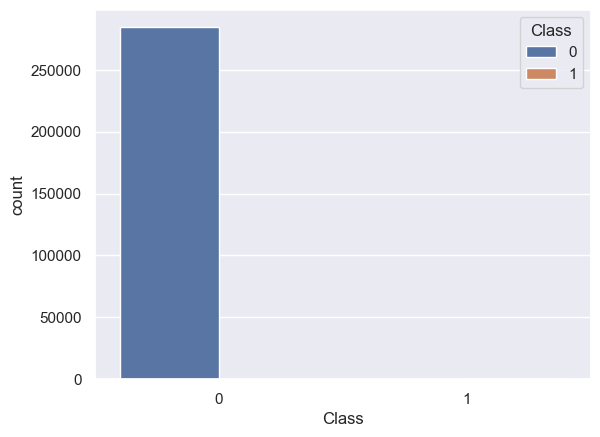

In [12]:
sb.countplot(x=df.Class,hue=df.Class)

# Split the data for training and testing

In [13]:
X = df.loc[df['Class']==1]
y = df.loc[df['Class']==0] 

In [14]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [15]:
y

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [16]:
from sklearn.model_selection import train_test_split 
X_train,X_test = train_test_split(X,test_size=0.2)
y_train,y_test = train_test_split(y,test_size=0.5)

In [17]:
train_Dataset = X_train.append(y_train)
test_Dataset = X_test.append(y_test)
yTrain = train_Dataset['Class']
yTest = test_Dataset['Class']
xTrain = train_Dataset.drop(columns=['Class'])
xTest = test_Dataset.drop(columns=['Class'])

# Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as roc
from sklearn.preprocessing import StandardScaler

lr = LinearRegression()
scaler = StandardScaler()

xTrain = scaler.fit_transform(xTrain)
xTest = scaler.fit_transform(xTest)

In [19]:
lr.fit(xTrain, yTrain)
predTrain = lr.predict(xTrain)

In [20]:
for i in range(0, len(predTrain)):
    if(predTrain[i]>=0.5):
        predTrain[i]=1
    else:
        predTrain[i]=0
print(classification_report(yTrain, predTrain))
print('ROC AUC Score: ',roc(yTrain, predTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142157
           1       0.90      0.45      0.60       393

    accuracy                           1.00    142550
   macro avg       0.95      0.73      0.80    142550
weighted avg       1.00      1.00      1.00    142550

ROC AUC Score:  0.7263927595660326


In [21]:
predTest = lr.predict(xTest)
for i in range(0, len(predTest)):
    if(predTest[i]>=0.5):
        predTest[i]=1
    else:
        predTest[i]=0
print(classification_report(yTest, predTest))
print('ROC AUC Score: ',roc(yTest, predTest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.70      0.49      0.58        99

    accuracy                           1.00    142257
   macro avg       0.85      0.75      0.79    142257
weighted avg       1.00      1.00      1.00    142257

ROC AUC Score:  0.7474008859966738


In [22]:
for x in range(10, 51, 2):
    print('Threshold set at: ',x*0.01)
    predTest = lr.predict(xTest)
    for i in range(0, len(predTest)):
        if(predTest[i]>=(x*0.01)):
            predTest[i]=1
        else:
            predTest[i]=0
    print(classification_report(yTest, predTest))
    print('ROC AUC Score: ',roc(yTest, predTest)) 

Threshold set at:  0.1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.68      0.82      0.74        99

    accuracy                           1.00    142257
   macro avg       0.84      0.91      0.87    142257
weighted avg       1.00      1.00      1.00    142257

ROC AUC Score:  0.9089572549877282
Threshold set at:  0.12
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.69      0.82      0.75        99

    accuracy                           1.00    142257
   macro avg       0.84      0.91      0.87    142257
weighted avg       1.00      1.00      1.00    142257

ROC AUC Score:  0.9089607722009698
Threshold set at:  0.14
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.69      0.82      0.75        99

    accuracy                           1.

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=21)

In [24]:
classifier.fit(xTrain, yTrain)

LogisticRegression(random_state=21)

In [25]:
predTrain_Logistic = classifier.predict(xTrain)
print(classification_report(yTrain, predTrain_Logistic))
print('ROC AUC Score: ',roc(yTrain, predTrain_Logistic))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142157
           1       0.91      0.70      0.79       393

    accuracy                           1.00    142550
   macro avg       0.96      0.85      0.90    142550
weighted avg       1.00      1.00      1.00    142550

ROC AUC Score:  0.8523223373734315


In [26]:
predTest_Logistic = classifier.predict(xTest)
print(classification_report(yTest, predTest_Logistic))
print('ROC AUC Score: ',roc(yTest, predTest_Logistic))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.66      0.77      0.71        99

    accuracy                           1.00    142257
   macro avg       0.83      0.88      0.86    142257
weighted avg       1.00      1.00      1.00    142257

ROC AUC Score:  0.8837012125219613


# Naive-Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(xTrain, yTrain)

GaussianNB()

In [28]:
predTrain_NB = NB.predict(xTrain)
print(classification_report(yTrain, predTrain_NB))
print('ROC AUC Score: ',roc(yTrain, predTrain_NB))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    142157
           1       0.09      0.83      0.17       393

    accuracy                           0.98    142550
   macro avg       0.55      0.90      0.58    142550
weighted avg       1.00      0.98      0.99    142550

ROC AUC Score:  0.9022202918283679


In [29]:
predTest_NB =NB.predict(xTest)
print(classification_report(yTest, predTest_NB))
print('ROC AUC Score: ',roc(yTest, predTest_NB))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    142158
           1       0.03      0.89      0.05        99

    accuracy                           0.98    142257
   macro avg       0.51      0.93      0.52    142257
weighted avg       1.00      0.98      0.99    142257

ROC AUC Score:  0.9325457120480968


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)

In [31]:
RF.fit(xTrain,yTrain.values.ravel())   

RandomForestClassifier()

In [32]:
predTrain_RF = RF.predict(xTrain)
print(classification_report(yTrain, predTrain_RF))
print('ROC AUC Score: ',roc(yTrain, predTrain_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142157
           1       1.00      1.00      1.00       393

    accuracy                           1.00    142550
   macro avg       1.00      1.00      1.00    142550
weighted avg       1.00      1.00      1.00    142550

ROC AUC Score:  1.0


In [33]:
predTrain_RF = RF.predict(xTest)
print(classification_report(yTest, predTrain_RF))
print('ROC AUC Score: ',roc(yTest, predTrain_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.82      0.85      0.84        99

    accuracy                           1.00    142257
   macro avg       0.91      0.92      0.92    142257
weighted avg       1.00      1.00      1.00    142257

ROC AUC Score:  0.9241791144040754


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [35]:
DT.fit(xTrain,yTrain.values.ravel())

DecisionTreeClassifier()

In [36]:
predTrain_DT = DT.predict(xTrain)
print(classification_report(yTrain, predTrain_DT))
print('ROC AUC Score: ',roc(yTrain, predTrain_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142157
           1       1.00      1.00      1.00       393

    accuracy                           1.00    142550
   macro avg       1.00      1.00      1.00    142550
weighted avg       1.00      1.00      1.00    142550

ROC AUC Score:  1.0


In [37]:
predTrain_DT = DT.predict(xTest)
print(classification_report(yTest, predTrain_DT))
print('ROC AUC Score: ',roc(yTest, predTrain_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.43      0.80      0.56        99

    accuracy                           1.00    142257
   macro avg       0.71      0.90      0.78    142257
weighted avg       1.00      1.00      1.00    142257

ROC AUC Score:  0.898617074386289


# K-Nearest Neighbours

In [38]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(xTrain, yTrain)

KNeighborsClassifier()

In [39]:
predictTrain_knn = KNN.predict(xTrain)
print(classification_report(yTrain, predictTrain_knn))
print('ROC AUC Score: ',roc(yTrain, predictTrain_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142157
           1       0.96      0.81      0.88       393

    accuracy                           1.00    142550
   macro avg       0.98      0.90      0.94    142550
weighted avg       1.00      1.00      1.00    142550

ROC AUC Score:  0.9032656811849122


In [40]:
predictTest_knn = KNN.predict(xTest)
print(classification_report(yTest, predictTest_knn))
print('ROC AUC Score: ',roc(yTest, predictTest_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.83      0.83      0.83        99

    accuracy                           1.00    142257
   macro avg       0.91      0.91      0.91    142257
weighted avg       1.00      1.00      1.00    142257

ROC AUC Score:  0.9140816215163068
